In [ ]:
import os
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from time import time
import tensorflow_hub as hub
import tensorflow as tf

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#thudersvm

In [ ]:
import numpy as np 

In [ ]:
! pip install thundersvm

     |████████████████████████████████| 512kB 11.1MB/s 


In [ ]:
!git clone https://github.com/Xtra-Computing/thundersvm.git


Cloning into 'thundersvm'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 7077 (delta 32), reused 40 (delta 18), pack-reused 6991
Receiving objects: 100% (7077/7077), 4.79 MiB | 34.31 MiB/s, done.
Resolving deltas: 100% (4762/4762), done.


In [ ]:
cd thundersvm


/content/thundersvm


In [ ]:
mkdir build && cd build && cmake .. && make -j

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Looking for pthread.h
-- Looking for pthread.h - found
-- Looking for pthread_create
-- Looking for pthread_create - not found
-- Looking for pthread_create in pthreads
-- Looking for pthread_create in pthreads - not found
-- Looking for pthread_create in pthread
-- Looking for pthread_create in pthread - found
-- Found Threads: TRUE  
-- Found OpenMP_C: -fopenmp (found version "4.5") 
-- Found OpenM

In [ ]:
pwd

'/content/thundersvm'

In [ ]:
cd python 

/content/thundersvm/python


In [ ]:
ls

README.md  setup.py  svm.py  thundersvm/


In [ ]:
from svm import *

In [ ]:
pwd

'/content/thundersvm/python'

In [ ]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating thundersvm.egg-info
writing thundersvm.egg-info/PKG-INFO
writing dependency_links to thundersvm.egg-info/dependency_links.txt
writing requirements to thundersvm.egg-info/requires.txt
writing top-level names to thundersvm.egg-info/top_level.txt
writing manifest file 'thundersvm.egg-info/SOURCES.txt'
writing manifest file 'thundersvm.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/thundersvm
copying thundersvm/thundersvm.py -> build/lib/thundersvm
copying thundersvm/__init__.py -> build/lib/thundersvm
copying thundersvm/libthundersvm.so -> build/lib/thundersvm
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/thundersvm
copying build/lib/thundersvm/libthundersvm.so -> build/bdist.linux-x86_64/egg/thundersvm
copying build/lib/thundersvm/thundersvm.py ->

In [ ]:
from thundersvm import SVC

In [ ]:
SVC()

SVC(C=1.0, cache_size=None, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', gpu_id=0,
    kernel='rbf', max_iter=-1, max_mem_size=-1, n_jobs=-1, probability=False,
    random_state=None, shrinking=False, tol=0.001, verbose=False)

# Enter Dataset And Preprocess

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
from bs4 import BeautifulSoup
from string import punctuation
import re,string,unicodedata
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

In [ ]:
os.environ['KAGGLE_USERNAME'] = "shreyanshgupta" # username from the json file
os.environ['KAGGLE_KEY'] = "53c4292282781654b84c32cbb8cb1ea0" # key from the json file
!kaggle datasets download -d mdepak/fakenewsnet

 54% 9.00M/16.6M [00:00<00:00, 23.8MB/s]
100% 16.6M/16.6M [00:00<00:00, 37.4MB/s]


In [ ]:
!unzip 'fakenewsnet.zip'

Archive:  fakenewsnet.zip
  inflating: BuzzFeedNews.txt        
  inflating: BuzzFeedNewsUser.txt    
  inflating: BuzzFeedUser.txt        
  inflating: BuzzFeedUserFeature.mat  
  inflating: BuzzFeedUserUser.txt    
  inflating: BuzzFeed_fake_news_content.csv  
  inflating: BuzzFeed_real_news_content.csv  
  inflating: PolitiFactNews.txt      
  inflating: PolitiFactNewsUser.txt  
  inflating: PolitiFactUser.txt      
  inflating: PolitiFactUserFeature.mat  
  inflating: PolitiFactUserUser.txt  
  inflating: PolitiFact_fake_news_content.csv  
  inflating: PolitiFact_real_news_content.csv  


In [ ]:
dfF = pd.read_csv("/content/BuzzFeed_fake_news_content.csv")

In [ ]:
dfR = pd.read_csv("/content/BuzzFeed_real_news_content.csv")

In [ ]:
dfF.columns

Index(['id', 'title', 'text', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'],
      dtype='object')

In [ ]:
dfF.drop(columns=['id', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'], inplace=True)

In [ ]:
dfF['labels'] = 0
dfF

,title,text,labels
0,Proof The Mainstream Media Is Manipulating The...,I woke up this morning to find a variation of ...,0
1,Charity: Clinton Foundation Distributed “Water...,Former President Bill Clinton and his Clinton ...,0
2,A Hillary Clinton Administration May be Entire...,After collapsing just before trying to step in...,0
3,Trump’s Latest Campaign Promise May Be His Mos...,"Donald Trump is, well, deplorable. He’s sugges...",0
4,Website is Down For Maintenance,Website is Down For Maintenance,0
...,...,...,...
86,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,0
87,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,0
88,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,0
89,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0


In [ ]:
dfR.columns

Index(['id', 'title', 'text', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'],
      dtype='object')

In [ ]:
dfR.drop(columns=['id', 'url', 'top_img', 'authors', 'source',
       'publish_date', 'movies', 'images', 'canonical_link', 'meta_data'], inplace=True)

In [ ]:
dfR['labels'] = 1
dfR

,title,text,labels
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,1
...,...,...,...
86,It’s “Trump is HITLER” Month at the Washington...,"Like much of the mainstream media, the Washing...",1
87,Obama’s team isn’t laughing at Trump anymore,2016 Obama’s team isn’t laughing at Trump anym...,1
88,"Georgia poll: Donald Trump, Hillary Clinton in...","Story highlights Trump has 45%, Clinton 42% an...",1
89,Chelsea Handler Gets The Last Word After RNC C...,There may be a few women out there who enjoy a...,1


In [ ]:
frame = [dfR,dfF]
df = pd.concat(frame)
df

,title,text,labels
0,Another Terrorist Attack in NYC…Why Are we STI...,"On Saturday, September 17 at 8:30 pm EST, an e...",1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",Less than a day after protests over the police...,1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...","Obama To UN: ‘Giving Up Liberty, Enhances Secu...",1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,Getty Images Wealth Of Nations Trump vs. Clint...,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",President Obama today vetoed a bill that would...,1
...,...,...,...
86,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,0
87,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,0
88,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,0
89,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,0


In [ ]:
df.text = df.title + ' ' + df.text
df.drop(columns='title', inplace=True)

In [ ]:
df

,text,labels
0,Another Terrorist Attack in NYC…Why Are we STI...,1
1,"Donald Trump: Drugs a 'Very, Very Big Factor' ...",1
2,"Obama To UN: ‘Giving Up Liberty, Enhances Secu...",1
3,Trump vs. Clinton: A Fundamental Clash over Ho...,1
4,"President Obama Vetoes 9/11 Victims Bill, Sett...",1
...,...,...
86,Hillary’s TOP Donor Country Just Auctioned Off...,0
87,Cavuto Just Exposed Lester Holt's Lies During ...,0
88,"The AP, In 2004, Said Your Boy Obama Was BORN ...",0
89,People Noticed Something Odd About Hillary's O...,0


In [ ]:
df.isna().sum()

text      0
labels    0
dtype: int64

In [ ]:
import random

In [ ]:
df = df.sample(frac=1)

In [ ]:
df

,text,labels
1,Charity: Clinton Foundation Distributed “Water...,0
78,Obama: “I bet when I die you’ll be happy to pe...,0
79,Pence gives no specifics on why Trump Foundati...,1
83,BOOM! Marines Send TERRORISTS Scathing Message...,0
30,Donna Brazile slams Trump for not apologizing ...,1
...,...,...
16,Armed Intruders Break in House…Armed Resident ...,1
59,Putin's Troll Army Caught Rigging Twitter To P...,0
23,"Obama wears hat, breaking ‘Politics 101’ rule ...",1
14,Hillary Denies She and Obama Founded ISIS…Then...,0


In [ ]:
df.reset_index(inplace=True,drop=True)
df

,text,labels
0,Charity: Clinton Foundation Distributed “Water...,0
1,Obama: “I bet when I die you’ll be happy to pe...,0
2,Pence gives no specifics on why Trump Foundati...,1
3,BOOM! Marines Send TERRORISTS Scathing Message...,0
4,Donna Brazile slams Trump for not apologizing ...,1
...,...,...
177,Armed Intruders Break in House…Armed Resident ...,1
178,Putin's Troll Army Caught Rigging Twitter To P...,0
179,"Obama wears hat, breaking ‘Politics 101’ rule ...",1
180,Hillary Denies She and Obama Founded ISIS…Then...,0


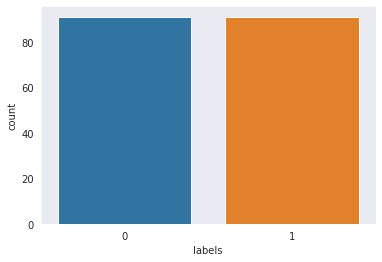

In [ ]:
sns.set_style('dark')
sns.countplot(df.labels)

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop = set(stopwords.words('english'))
stop.remove('not')
stop.remove('no')
stop.update(string.punctuation)

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
def remhtml(text):
  soup = BeautifulSoup(text,"html.parser")
  return soup.get_text()

def rem_bw_sq_bracks(text):
  return re.sub('\[[^]]*\]','',text)

def remhttplink(text):
  return re.sub(r'http\S+','',text)

def remhttpAT(text):
  return re.sub(r'@','',text)

def remstopwords(text):
  snw = SnowballStemmer('english')
  word_list = tokenizer.tokenize(text)
  clean_list = [w for w in word_list if w not in stop]
  clean_text = ' '.join(clean_list)
  return clean_text

def clean_sent(text):
  text = remhtml(text)
  text = rem_bw_sq_bracks(text)
  text = remhttplink(text)
  text = remstopwords(text)
  return text

df['text'] = df['text'].apply(clean_sent)

NameError: ignored

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
def pos_tags(text):
    text = text.split()
    non_stop = [word for word in text if word not in stopwords.words("english")]
    pos = [part[1] for part in nltk.pos_tag(non_stop)]
    pos = " ".join(pos)
    return pos

In [ ]:
starting = time()
df['pos'] = df['text'].apply(pos_tags)
print(round((time()-starting)/60,2))

0.16


In [ ]:
xData_text = df.text.values
xData_pos = df.pos.values
yData = df.labels.values

In [ ]:
xData_pos = xData_pos.astype('str')
xData_text = xData_text.astype('str')
yData=yData.astype('int')
yData = yData.reshape((-1,1))

## Feature Extraction, Feature Selection and Classifiers



In [ ]:
from keras.preprocessing.text import text_to_word_sequence
from gensim.models.doc2vec import Doc2Vec,TaggedDocument
from gensim.models import Word2Vec,KeyedVectors
from gensim import utils
from time import time
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,log_loss,f1_score, precision_score, recall_score

In [ ]:
def posTagsVectorize(posTags):
  st = time()
  cv = CountVectorizer()
  posTagged = cv.fit_transform(posTags).toarray()
  en = time()
  print(f"POS Tags Completed:{round((st-en)/60,2)}")
  return posTagged

In [ ]:
# Word2Vec
def word2VecScratch(textData):
  # Convert Words to sequence
  seqData = [text_to_word_sequence(i) for i in textData]
  # Define and Train the model
  print("Word2Vec Training Start")
  model = Word2Vec(seqData,size=100,window=5,cbow_mean=1)
  model.save("./word2vecEmbed.model")
  trainedVectors = KeyedVectors.load("./word2vecEmbed.model")
  print("Word2Vec Model Loaded")
  # Prepare words acc count values
  w2v = dict()
  for item in trainedVectors.wv.vocab:
    w2v[item] = trainedVectors.wv.vocab[item].count
  # Sort the words according to the count and only pick most frequent words
  w2vSorted=dict(sorted(w2v.items(), key=lambda x: x[1],reverse=True))
  keys = w2vSorted.keys()
  keys_list = [i for i in keys]
  keys = np.array(keys_list)
  print(f"Total words are: {keys.shape}")
  # Prepare embedding map
  embeddings = {}
  for key in keys:
    embeddings[key] = trainedVectors[key]
  print("Embeddings Prepared")
  return embeddings

def word2VecVectorize(sentence, embeddingMapW2V):
  words = sentence.split()
  if len(words)==0:
    return np.zeros((100,))
  avg = np.zeros((100,))
  total = 0
  for w in words:
    try:
      total += embeddingMapW2V[w]
    except:
      total += np.zeros((100,))
  
  avg = total/len(words)
  return avg

def mainWord2Vec(textData):
  embeddingMap = word2VecScratch(textData)
  vectorizedData = np.array([word2VecVectorize(i,embeddingMap) for i in textData])
  print("Done")
  return vectorizedData

In [ ]:
# Doc2Vec
max_epochs = 100
vec_size = 100
alpha = 0.025

def tagData(textData):
  # Convert Words to sequence and creating a tagged document
  taggedData = [TaggedDocument(words=text_to_word_sequence(_d.lower()),
                                tags=[str(i)]) for i, _d in enumerate(textData)]
  return taggedData

def defineAndTrainModel(tagged_data):
  model = Doc2Vec(size=vec_size,
                  alpha=alpha, 
                  min_alpha=0.00025,
                  min_count=1,
                  dm =1)

  model.build_vocab(tagged_data)
  for epoch in range(max_epochs):
    # print('iteration {0}'.format(epoch))
    model.train(tagged_data,
    total_examples=model.corpus_count,
    epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha
    model.save("./doc2vec.model")
    # print("Model Saved")

def cvtText2Vec():
  model= Doc2Vec.load("./doc2vec.model")
  vectorizedText = model.docvecs.vectors_docs
  return vectorizedText

def mainDoc2Vec(textData):
  taggedData = tagData(textData)
  defineAndTrainModel(taggedData)
  vectorizedText = cvtText2Vec()
  return vectorizedText

In [ ]:
# Sentence Embedding
def embed(textData):
  module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
  model = hub.load(module_url)
  print ("module %s loaded" % module_url)
  return model(textData)

In [ ]:
# TFIDF
def basicTfidf(textData):
  tfidf = TfidfVectorizer(lowercase=False,max_features=1000)
  vectorizedData = tfidf.fit_transform(xData_text).toarray()
  return vectorizedData

In [ ]:
def formTrainingData(vectorizedText, vectorizedTags):
  xDataFinal = np.hstack((vectorizedText, vectorizedTags))
  return xDataFinal

In [ ]:
def vectorizeAndSave(textData, posTags, model, fileName, dataName):
  posTagV = posTagsVectorize(posTags)
  xFVec = model(textData)
  xData = np.hstack((xFVec,posTagV))
  dataset = np.hstack((xData, yData))
  if not os.path.exists("/content/drive/MyDrive/Misinformation Datasets/"+dataName):
    os.mkdir("/content/drive/MyDrive/Misinformation Datasets/"+dataName)
  print(dataset.shape)
  np.save('/content/drive/MyDrive/Misinformation Datasets/'+dataName+'/'+fileName+'.npy', dataset)

In [ ]:
vectorizeAndSave(xData_text, xData_pos, basicTfidf, "buzzfeedTfidf", "Buzzfeed")

POS Tags Completed:-0.0
(182, 1032)


In [ ]:
vectorizeAndSave(xData_text, xData_pos, mainDoc2Vec, "buzzfeedDocTVec", "Buzzfeed")

POS Tags Completed:-0.0
(182, 132)


In [ ]:
vectorizeAndSave(xData_text, xData_pos, embed, "buzzfeedSentEmbed","Buzzfeed")

POS Tags Completed:-0.0
module https://tfhub.dev/google/universal-sentence-encoder/4 loaded
(182, 544)


In [ ]:
vectorizeAndSave(xData_text, xData_pos, mainWord2Vec, "buzzfeedWord2Vec","Buzzfeed")

POS Tags Completed:-0.0
Word2Vec Training Start
Word2Vec Model Loaded
Total words are: (2429,)
Embeddings Prepared
Done
(182, 132)


# PSO+GA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.naive_bayes import MultinomialNB,GaussianNB
import random

In [ ]:
from sklearn.svm import SVC

In [ ]:
# Load the array
dataset = np.load("/content/drive/MyDrive/Misinformation Datasets/Buzzfeed/buzzfeedDocTVec.npy")
dataset.shape

(182, 132)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[:,:-1], dataset[:,-1], test_size=0.25, stratify=dataset[:,-1])

In [ ]:
lr = LogisticRegression(max_iter=150)

In [ ]:
msv = SVC(max_iter=200)

In [ ]:
msv

SVC(C=1.0, cache_size=None, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', gpu_id=0,
    kernel='rbf', max_iter=200, max_mem_size=-1, n_jobs=-1, probability=False,
    random_state=None, shrinking=False, tol=0.001, verbose=False)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state= 0)

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr.score(x_test,y_test)

0.6739130434782609

#olderversion 


In [ ]:
def sigmoid(x):
  return (1/(1+np.exp(-1*x)))

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))


class PSO:
    def __init__(self, x_train, y_train, x_val, y_val, popu_size, model, maxEpoch=100, maxV=4, minV=-4, stopE=20, particles_init=None):
        self.size = x_train.shape[1]
        if particles_init is not None:
            self.particles = particles_init
        else:
            self.particles = np.random.randint(2, size=(popu_size, self.size))
        self.maxEarlyStop = stopE
        self.maxEpochs = maxEpoch
        self.maxVelocity = maxV
        self.minVelocity = minV
        self.popuSize = popu_size
        self.trainFeatures = x_train
        self.valFeatures = x_val
        self.trainLabels = y_train
        self.valLabels = y_val 
        self.velocity = np.random.rand(popu_size, self.size)
        self.pbest = np.zeros((popu_size, self.size))
        self.pbestScore = np.zeros((popu_size,), dtype=float)
        self.model = model
        self.model.fit(self.trainFeatures, self.trainLabels)
        self.gbestScore = self.model.score(self.valFeatures, self.valLabels)
        self.gbest = np.ones((self.size,), dtype=float)
        self.gbestPopu = np.ones((popu_size, self.size))

    def checkFitness(self):
        bestItr = np.zeros((self.size,))
        bestItrScore = 0
        for i in range(self.popuSize):
            reducedFeaturesTrain = np.multiply(self.particles[i], self.trainFeatures)
            reducedFeaturesVal = np.multiply(self.particles[i], self.valFeatures)
            self.model.fit(reducedFeaturesTrain, self.trainLabels)
            score = self.model.score(reducedFeaturesVal, self.valLabels)

            if score > self.pbestScore[i]:
                self.pbestScore[i] = score
                self.pbest[i] = self.particles[i]

            if score > self.gbestScore:
                self.gbestScore = score
                self.gbest = self.pbest[i]
                self.gbestPopu = self.pbest

            if score > bestItrScore:
                bestItrScore = score
                bestItr = self.particles[i]

        return bestItr, bestItrScore

    def updateParticles(self, itr, bestItr):
        wmax = 1.0
        wmin = 0.6
        kmin = 1.5
        kmax = 4.0
        w = wmax - (itr / self.maxEpochs) * (wmax - wmin)
        k = kmin + (itr / self.maxEpochs) * (kmax - kmin)
        for i in range(self.popuSize):
            self.velocity[i] = w * self.velocity[i] + k * np.random.rand() * (self.pbest[i] - self.particles[i]) + \
                               k * np.random.rand() * (self.gbest - self.particles[i]) + \
                               k * np.random.rand() * (bestItr - self.particles[i])

            for j in range(self.size):
                if self.velocity[i][j] > self.maxVelocity:
                    self.velocity[i][j] = self.maxVelocity
                elif self.velocity[i][j] < self.minVelocity:
                    self.velocity[i][j] = self.minVelocity

            veloSig = sigmoid(self.velocity[i])
            for j in range(self.size):
                self.particles[i][j] = (np.random.rand() < veloSig[j]) * 1

    def logging(self, allScores):
        print("Best Score ", self.gbestScore)
        print("Best Features: ", self.gbest)
        gbest_indices = np.where(self.gbest == 1)[0]
        gbest_num_elements = gbest_indices.shape[0]
        print("Indices Selected: ", gbest_indices)
        print("Total Elements Selected: ", gbest_num_elements)
        plt.plot(allScores, )
    
    def saveLog(self, path):
      print("Saving...")
      if not os.path.exists(path+"/"+ type(self.model).__name__):
        os.mkdir(path+"/"+ type(model).__name__)
      np.save(path+"/"+ type(self.model).__name__ + "/populationPSO.npy", self.particles)
      np.save(path+"/"+ type(self.model).__name__ + "/velocityPSO.npy", self.velocity)
      np.save(path+"/"+ type(self.model).__name__ + "/personalBestPSO.npy", self.pbest)
      np.save(path+"/"+ type(self.model).__name__ + "/globalBestPSO.npy", self.gbest)
      np.save(path+"/"+ type(self.model).__name__ + "/globalBestPopulationPSO.npy", self.gbestPopu)
      print("Saved!")
      return

    def mainPso(self, path):
        allScores = []
        epoch = 0
        earlyStop = 0
        while epoch < self.maxEpochs:
            start = time()
            bestItr, bestItrScore = self.checkFitness()
            self.updateParticles(itr=epoch, bestItr=bestItr)
            end = time()
            if allScores:
                if self.gbestScore == allScores[-1]:
                    earlyStop += 1
                    if earlyStop == self.maxEarlyStop:
                        print("Early Stopping due to no increase in fitness...")
                        self.logging(allScores)
                        return allScores
                else:
                    earlyStop = 0

            print(f"Epochs: {epoch + 1}/{self.maxEpochs}\t Time Taken: {round((end - start), 3)} secs\t Best Score: "
                  f"{self.gbestScore}\t Best Score Epoch: {bestItrScore}")
            self.saveLog(path)
            allScores.append(self.gbestScore)
            epoch += 1

        self.logging(allScores)
        return allScores


In [ ]:
def cvtDataforGA(best_features, x_train, x_test):
  newXTrain = np.multiply(best_features,x_train)
  newXTest = np.multiply(best_features,x_test)
  return newXTrain,newXTest

In [ ]:
def reduceFeature(solution, feats):
    reducedFeatures = np.multiply(solution,feats)
    return reducedFeatures


class GA:
    def __init__(self, featuresTrain, labelsTrain, featureTest, labelsTest, model, nPopulation=30, nParentsMating=4,
                 nMutation=2, nosGen=100, newPopu=None):
        self.featuresTrain = featuresTrain
        self.labelsTrain = labelsTrain
        self.featuresTest = featureTest
        self.labelsTest = labelsTest
        self.nosPopu = nPopulation
        self.nosParentsMating = nParentsMating
        self.nosMutation = nMutation
        popuShape = (self.nosPopu, self.featuresTrain.shape[1])
        if newPopu is not None:
            self.population = newPopu
        else:
            self.population = np.random.randint(low=0, high=2, size=popuShape)

        self.numGenerations = nosGen
        self.model = model
        self.parents = np.empty(shape=(self.nosParentsMating, self.featuresTrain.shape[1]))
        offspringSize = (self.nosPopu - self.nosParentsMating, self.featuresTrain.shape[1])
        self.offspring = np.empty(shape=offspringSize)
        self.bestSol = np.ones((1, self.population.shape[1]))
        self.global_best_popu =  np.ones((1, self.population.shape[1]))
        self.global_best_fitness = 0 

    def calculateFitness(self):
        accs = np.zeros(shape=self.population.shape)
        idx = 0
        for currentSol in self.population:
            reducedFeaturesTrain = reduceFeature(currentSol, self.featuresTrain)
            reducedFeaturesTest = reduceFeature(currentSol, self.featuresTest)
            self.model.fit(reducedFeaturesTrain, self.labelsTrain)
            accs[idx] = self.model.score(reducedFeaturesTest, self.labelsTest)
            idx += 1
        return accs

    def selectMatingPool(self, fitness):
        for nParent in range(self.nosParentsMating):
            maxFitnessIdx = np.where(fitness == np.max(fitness))[0][0]
            self.parents[nParent, :] = self.population[maxFitnessIdx, :]
            fitness[maxFitnessIdx] = -99999999999

    # Single point crossover
    def crossover(self):
        crossoverPoint = np.uint8(self.offspring.shape[1] / 2)

        for k in range(self.offspring.shape[0]):
            parentIdx1 = k % self.parents.shape[0]
            parentIdx2 = (k + 1) % self.parents.shape[0]
            self.offspring[k, 0:crossoverPoint] = self.parents[parentIdx1, 0:crossoverPoint]
            self.offspring[k, crossoverPoint:] = self.parents[parentIdx2, crossoverPoint:]

    def mutation(self):
        mutationIdx = np.random.randint(low=0, high=self.offspring.shape[1], size=self.nosMutation)
        for i in range(self.offspring.shape[0]):
            self.offspring[i, mutationIdx] = 1 - self.offspring[i, mutationIdx]

    def logging(self, fitness, bestMatchIdx):
        bestSolIdx = np.where(self.bestSol == 1)[0]
        bestSolNumelements = bestSolIdx.shape[0]
        bestSolFitness = fitness[bestMatchIdx]
        print(f"Best Match Idx: {bestSolIdx}")
        print(f"Best Solution: {self.bestSol}")
        print(f"Number of Elements Selected: {bestSolNumelements}")
        print(f"Best solution fitness: {bestSolFitness}")
    
    def saveLog(self, path):
      print("Saving...")
      if not os.path.exists(path+"/"+ type(self.model).__name__):
        os.mkdir(path+"/"+ type(model).__name__)
      np.save(path+"/"+ type(self.model).__name__ + "/populationGA.npy", self.population)
      np.save(path+"/"+ type(self.model).__name__ + "/bestSolTillNowGA.npy", self.global_best_popu)
      print("Saved!")
      return

    def gaMain(self, path):
        bestOutputs = []
        globalbest = []
        for gen in range(self.numGenerations):
            start = time()
            print(f"Generations {gen}/{self.numGenerations}")
            fitness = self.calculateFitness()
            bestOutputs.append(np.max(fitness))
            self.selectMatingPool(fitness)
            self.crossover()
            self.mutation()
            self.population[0:self.parents.shape[0], :] = self.parents
            self.population[self.parents.shape[0]:, :] = self.offspring
            end = time()
            bestMatchIdx = np.where(fitness == np.max(fitness))[0][0]
            self.bestSol = self.population[bestMatchIdx, :]
            if bestOutputs[-1] >= self.global_best_fitness:
              self.global_best_fitness = bestOutputs[-1]
              self.global_best_popu = self.bestSol
            globalbest.append(self.global_best_fitness)
            self.saveLog(path)
            print(f"Time Taken {round((end-start),2)} secs Best Output "
                  f"{bestOutputs[-1]} Best till now - " f"{self.global_best_fitness}")
        fitness = self.calculateFitness()
        bestMatchIdx = np.where(fitness == np.max(fitness))[0][0]
        self.bestSol = self.population[bestMatchIdx, :]
        if np.max(fitness) >= self.global_best_fitness:
          self.global_best_fitness = np.max(fitness)
          self.global_best_popu = self.bestSol
        self.logging(fitness, bestMatchIdx)
        return globalbest

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def preTraining(xData, yData, model, path):
  x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.30, stratify=yData)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  precisionB = precision_score(y_test, y_pred, average=None)
  recallB = recall_score(y_test, y_pred, average=None)
  f1SB = f1_score(y_test, y_pred, average=None)
  accB = np.array(model.score(x_test, y_test))
  confMatB = confusion_matrix(y_test, y_pred)
  print("before - " + 2*"\n")
  print(classification_report(y_test,y_pred,digits = 6))
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionBefore.npy", precisionB)
  np.save(path+"/"+ type(model).__name__ + "/recallBefore.npy", recallB)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreBefore.npy", f1SB)
  np.save(path+"/"+ type(model).__name__ + "/accBefore.npy", accB)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixBefore.npy", confMatB)
  return x_train, x_test, y_train, y_test

In [ ]:
def intermidiateTraining(redXtrain, redXtest, y_train, y_test, model, path):
  model.fit(redXtrain, y_train)
  y_pred = model.predict(redXtest)
  precisionAPSO = precision_score(y_test, y_pred, average=None)
  recallAPSO = recall_score(y_test, y_pred, average=None)
  f1SAPSO = f1_score(y_test, y_pred, average=None)
  accAPSO = np.array(model.score(redXtest, y_test))
  confMatAPSO = confusion_matrix(y_test, y_pred)
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionAfterPSO.npy", precisionAPSO)
  np.save(path+"/"+ type(model).__name__ + "/recallAfterPSO.npy", recallAPSO)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreAfterPSO.npy", f1SAPSO)
  np.save(path+"/"+ type(model).__name__ + "/accAfterPSO.npy", accAPSO)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixAfterPSO.npy", confMatAPSO)

In [ ]:
def postTraining(bestFeatures, x_train, x_test, y_train, y_test, model, path):
  xRedTrain, xRedTest = cvtDataforGA(bestFeatures, x_train, x_test)
  model.fit(xRedTrain, y_train)
  y_pred = model.predict(xRedTest)
  precisionA = precision_score(y_test, y_pred, average=None)
  recallA = recall_score(y_test, y_pred, average=None)
  f1SA = f1_score(y_test, y_pred, average=None)
  accA = np.array(model.score(xRedTest, y_test))
  confMatA = confusion_matrix(y_test, y_pred)
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionAfter.npy", precisionA)
  np.save(path+"/"+ type(model).__name__ + "/recallAfter.npy", recallA)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreAfter.npy", f1SA)
  np.save(path+"/"+ type(model).__name__ + "/accAfter.npy", accA)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixAfter.npy", confMatA)

In [ ]:
def trainModel(xData, yData, model, path, populationSize=20):
  """In the path parameter only enter till the folder eg /content/drive/MyDrive/Calibre/FAKE NEWS TRASAC/DATASETS/ISOT"""
  random.seed(2)
  x_train, x_test, y_train, y_test = preTraining(xData, yData, model, path)
  pso = PSO(x_train, y_train, x_test, y_test, populationSize, model)
  allSc = pso.mainPso(path)
  reducedXTrain, reducedXTest = cvtDataforGA(pso.gbest, x_train, x_test)
  intermidiateTraining(reducedXTrain, reducedXTest, y_train, y_test, model, path)
  print(pso.gbestPopu.shape)
  ga = GA(reducedXTrain, y_train, reducedXTest, y_test, model, nPopulation=populationSize, newPopu=pso.gbestPopu)
  bsOps = ga.gaMain(path)
  new_x_train, new_x_test = cvtDataforGA(ga.global_best_popu,x_train,x_test)
  model.fit(new_x_train,y_train)
  new_y_pred = model.predict(new_x_test)
  print("after - " + 2*"\n")
  print(classification_report(y_test,new_y_pred,digits = 6))
  postTraining(ga.global_best_popu, x_train, x_test, y_train, y_test, model, path)
  plt.plot(allSc, label='PSO')
  plt.plot(bsOps, label='GA')
  plt.xlabel('Iterations')
  plt.ylabel('fitness')
  plt.legend()
  plt.show()
  scores = allSc + bsOps
  return ga.global_best_popu,scores

In [ ]:
def compiling(models, folder):
  files = glob.glob(folder +"/*.npy")
  for f in files:
    dataset = np.load(f)
    print(5 *"\n")
    print("Running on :" + f)
    print(2*"\n")
    for model in models:
      print("current model - " + type(model).__name__ )
      if not os.path.exists(f[:-4]):
        os.mkdir(f[:-4])
      bestFeatures,Finalscores = trainModel(dataset[:,:-1], dataset[:,-1], model=model, path=f[:-4], populationSize=40)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/bestFeature.npy",bestFeatures)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/scores.npy",Finalscores)
      print("end of CURR MODEL")
      print(2* "\n")







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2/liarTfidf.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.497059  0.497938  0.497498      1697
         1.0   0.601497  0.600654  0.601075      2141

    accuracy                       0.555237      3838
   macro avg   0.549278  0.549296  0.549286      3838
weighted avg   0.555319  0.555237  0.555278      3838

Epochs: 1/100	 Time Taken: 99.155 secs	 Best Score: 0.5674830640958832	 Best Score Epoch: 0.5674830640958832
Saving...
Saved!
Epochs: 2/100	 Time Taken: 114.914 secs	 Best Score: 0.5693069306930693	 Best Score Epoch: 0.5693069306930693
Saving...
Saved!
Epochs: 3/100	 Time Taken: 126.721 secs	 Best Score: 0.5698280354351225	 Best Score Epoch: 0.5698280354351225
Saving...
Saved!
Epochs: 4/100	 Time Taken: 112.382 secs	 Best Score: 0.5776446065659198	 Best Score Epoch: 0.5776446065659198
Saving...
Saved!
Epochs: 5/100	 T

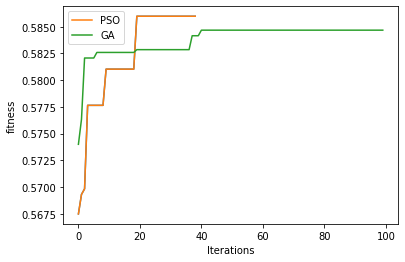

end of CURR MODEL









Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2/liarDocTVec.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.465849  0.470242  0.468035      1697
         1.0   0.576941  0.572630  0.574777      2141

    accuracy                       0.527358      3838
   macro avg   0.521395  0.521436  0.521406      3838
weighted avg   0.527821  0.527358  0.527580      3838

Epochs: 1/100	 Time Taken: 30.992 secs	 Best Score: 0.5364773319437207	 Best Score Epoch: 0.5364773319437207
Saving...
Saved!
Epochs: 2/100	 Time Taken: 37.224 secs	 Best Score: 0.5364773319437207	 Best Score Epoch: 0.5341323606044815
Saving...
Saved!
Epochs: 3/100	 Time Taken: 35.063 secs	 Best Score: 0.539343408025013	 Best Score Epoch: 0.539343408025013
Saving...
Saved!
Epochs: 4/100	 Time Taken: 35.713 secs	 Best Score: 0.539343408025013	 Best Score Epoch: 0.5383011985409067
Saving...
Saved!

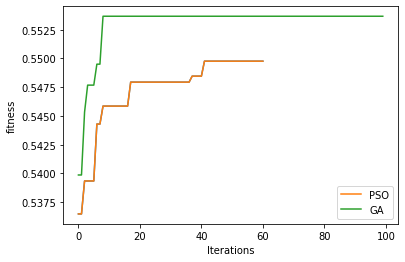

end of CURR MODEL









Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2/liarSentEmbed.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.465686  0.447849  0.456594      1697
         1.0   0.575249  0.592714  0.583851      2141

    accuracy                       0.528661      3838
   macro avg   0.520468  0.520281  0.520222      3838
weighted avg   0.526805  0.528661  0.527583      3838

Epochs: 1/100	 Time Taken: 146.908 secs	 Best Score: 0.5474205315268369	 Best Score Epoch: 0.5474205315268369
Saving...
Saved!
Epochs: 2/100	 Time Taken: 180.634 secs	 Best Score: 0.5523710265763419	 Best Score Epoch: 0.5523710265763419
Saving...
Saved!
Epochs: 3/100	 Time Taken: 173.919 secs	 Best Score: 0.5523710265763419	 Best Score Epoch: 0.5497655028660761
Saving...
Saved!
Epochs: 4/100	 Time Taken: 175.039 secs	 Best Score: 0.5523710265763419	 Best Score Epoch: 0.5508077123501823
Saving.

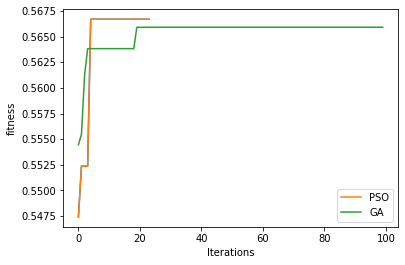

end of CURR MODEL









Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2/liarWord2Vec.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.476562  0.503241  0.489539      1697
         1.0   0.587977  0.561887  0.574636      2141

    accuracy                       0.535956      3838
   macro avg   0.532270  0.532564  0.532087      3838
weighted avg   0.538714  0.535956  0.537009      3838

Epochs: 1/100	 Time Taken: 34.603 secs	 Best Score: 0.5541948931735279	 Best Score Epoch: 0.5541948931735279
Saving...
Saved!
Epochs: 2/100	 Time Taken: 45.171 secs	 Best Score: 0.5541948931735279	 Best Score Epoch: 0.5476810838978635
Saving...
Saved!
Epochs: 3/100	 Time Taken: 39.978 secs	 Best Score: 0.5541948931735279	 Best Score Epoch: 0.5534132360604481
Saving...
Saved!
Epochs: 4/100	 Time Taken: 38.506 secs	 Best Score: 0.554715997915581	 Best Score Epoch: 0.554715997915581
Saving...
Save

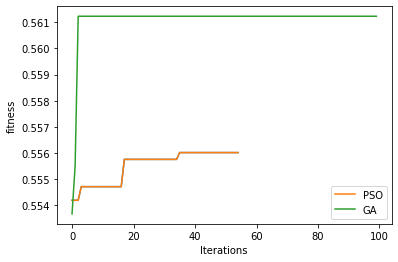

end of CURR MODEL





In [ ]:
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2"
models = [dt]
compiling(models, path)







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2/liarTfidf.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.595339  0.496759  0.541600      1697
         1.0   0.647399  0.732368  0.687267      2141

    accuracy                       0.628192      3838
   macro avg   0.621369  0.614564  0.614433      3838
weighted avg   0.624380  0.628192  0.622859      3838

Epochs: 1/100	 Time Taken: 72.256 secs	 Best Score: 0.6281917665450756	 Best Score Epoch: 0.622980719124544
Saving...
Saved!
Epochs: 2/100	 Time Taken: 73.003 secs	 Best Score: 0.6281917665450756	 Best Score Epoch: 0.6276706618030224
Saving...
Saved!
Epochs: 3/100	 Time Taken: 72.13 secs	 Best Score: 0.6321000521104742	 Best Score Epoch: 0.6321000521104742
Saving...
Saved!
Epochs: 4/100	 Time Taken: 71.927 secs	 Best Score: 0.6326211568525274	 Best Score Epoch: 0.6326211568525274
Saving...
Saved!
Epochs: 5/100	 Time Taken

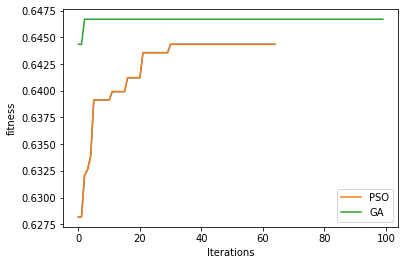

end of CURR MODEL



current model - SVC
before - 


              precision    recall  f1-score   support

         0.0   0.666667  0.003536  0.007034      1697
         1.0   0.558370  0.998599  0.716248      2141

    accuracy                       0.558624      3838
   macro avg   0.612518  0.501067  0.361641      3838
weighted avg   0.606254  0.558624  0.402664      3838

Epochs: 1/100	 Time Taken: 84.406 secs	 Best Score: 0.5586242834809797	 Best Score Epoch: 0.5581031787389266
Saving...
Saved!
Epochs: 2/100	 Time Taken: 85.727 secs	 Best Score: 0.5586242834809797	 Best Score Epoch: 0.5586242834809797
Saving...
Saved!
Epochs: 3/100	 Time Taken: 86.831 secs	 Best Score: 0.5586242834809797	 Best Score Epoch: 0.5583637311099531
Saving...
Saved!
Epochs: 4/100	 Time Taken: 87.35 secs	 Best Score: 0.5586242834809797	 Best Score Epoch: 0.5586242834809797
Saving...
Saved!
Epochs: 5/100	 Time Taken: 87.882 secs	 Best Score: 0.5586242834809797	 Best Score Epoch: 0.5586242834809797
Saving..

In [ ]:
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2"
models = [lr,msv,dt]
compiling(models, path)

In [ ]:
ga = GA(x_train, y_train,x_test, y_test,model=model, nPopulation=30, nosGen = 5)

In [ ]:
bsOps = ga.gaMain("/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar2/liarDocTVec")

Generations 0/5
Saving...
Saved!
Time Taken 10.51 secs Best Output 0.5947467166979362 Best till now - 0.5947467166979362
Generations 1/5
Saving...
Saved!
Time Taken 10.71 secs Best Output 0.5947467166979362 Best till now - 0.5947467166979362
Generations 2/5
Saving...
Saved!
Time Taken 10.41 secs Best Output 0.5975609756097561 Best till now - 0.5975609756097561
Generations 3/5
Saving...
Saved!
Time Taken 10.37 secs Best Output 0.5975609756097561 Best till now - 0.5975609756097561
Generations 4/5
Saving...
Saved!
Time Taken 9.21 secs Best Output 0.5975609756097561 Best till now - 0.5975609756097561
Best Match Idx: [  0   2   3   4   5   7  10  11  12  14  15  17  18  19  23  24  27  28
  29  31  33  35  37  38  42  44  45  49  52  54  56  58  59  60  61  66
  67  68  69  75  76  78  79  82  83  84  87  90  92  97  98  99 101 104
 107 111 112 114 117 118 122 125 126 128 130 132]
Best Solution: [1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0
 1 1 0 0 0 1 0 1 1 0 

# Final Version GA PSO 

In [ ]:
def reduceFeature(solution, feats):
    selectedElementIdx = np.where(solution == 1)[0]
    reducedFeatures = feats[:, selectedElementIdx]
    return reducedFeatures

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
np.random.seed(42)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))


class PSO:
    def __init__(self, size, popu_size, model, maxEpoch=100, maxV=4, minV=-4, stopE=35, particles_init=None):
        self.size = size
        if particles_init is not None:
            self.particles = particles_init
        else:
            self.particles = np.random.randint(2, size=(popu_size, self.size))
        self.maxEarlyStop = stopE
        self.maxEpochs = maxEpoch
        self.maxVelocity = maxV
        self.minVelocity = minV
        self.popuSize = popu_size
        self.velocity = np.random.rand(popu_size, self.size)
        self.pbest = np.zeros((popu_size, self.size))
        self.pbestScore = np.zeros((popu_size,), dtype=float)
        self.model = model
        self.gbestScore = 0
        self.gbest = np.ones((self.size,), dtype=float)
        self.gbestPopu = np.ones((popu_size, self.size))

    def checkFitness(self, trainFeatures, valFeatures, trainLabels, valLabels):
        bestItr = np.zeros((self.size,))
        bestItrScore = 0
        for i in range(self.popuSize):
            reducedFeaturesTrain = reduceFeature(self.particles[i], trainFeatures)
            reducedFeaturesVal = reduceFeature(self.particles[i], valFeatures)
            self.model.fit(reducedFeaturesTrain, trainLabels)
            score = self.model.score(reducedFeaturesVal, valLabels)

            if score > self.pbestScore[i]:
                self.pbestScore[i] = score
                self.pbest[i] = self.particles[i]

            if score > self.gbestScore:
                self.gbestScore = score
                self.gbest = self.pbest[i]
                self.gbestPopu = self.pbest

            if score > bestItrScore:
                bestItrScore = score
                bestItr = self.particles[i]

        return bestItr, bestItrScore

    def updateParticles(self, itr, bestItr):
        wmax = 1.0
        wmin = 0.6
        kmin = 1.5
        kmax = 4.0
        w = wmax - (itr / self.maxEpochs) * (wmax - wmin)
        k = kmin + (itr / self.maxEpochs) * (kmax - kmin)
        for i in range(self.popuSize):
            self.velocity[i] = w * self.velocity[i] + k * np.random.rand() * (self.pbest[i] - self.particles[i]) + \
                               k * np.random.rand() * (self.gbest - self.particles[i]) + \
                               k * np.random.rand() * (bestItr - self.particles[i])

            for j in range(self.size):
                if self.velocity[i][j] > self.maxVelocity:
                    self.velocity[i][j] = self.maxVelocity
                elif self.velocity[i][j] < self.minVelocity:
                    self.velocity[i][j] = self.minVelocity

            veloSig = sigmoid(self.velocity[i])
            for j in range(self.size):
                self.particles[i][j] = (np.random.rand() < veloSig[j]) * 1

    def logging(self, allScores):
        print("Best Score ", self.gbestScore)
        print("Best Features: ", self.gbest)
        gbest_indices = np.where(self.gbest == 1)[0]
        gbest_num_elements = gbest_indices.shape[0]
        print("Indices Selected: ", gbest_indices)
        print("Total Elements Selected: ", gbest_num_elements)
        plt.plot(allScores, )
        plt.show()
      
    def saveLog(self, path):
      if not os.path.exists(path+"/"+ type(self.model).__name__):
        os.mkdir(path+"/"+ type(model).__name__)
      np.save(path+"/"+ type(self.model).__name__ + "/populationPSO.npy", self.particles)
      np.save(path+"/"+ type(self.model).__name__ + "/velocityPSO.npy", self.velocity)
      np.save(path+"/"+ type(self.model).__name__ + "/personalBestPSO.npy", self.pbest)
      np.save(path+"/"+ type(self.model).__name__ + "/globalBestPSO.npy", self.gbest)
      np.save(path+"/"+ type(self.model).__name__ + "/globalBestPopulationPSO.npy", self.gbestPopu)
      return

    def mainPso(self, trainFeatures, valFeatures, trainLabels, valLabels, path):
        allScores = []
        epoch = 0
        earlyStop = 0
        while epoch < self.maxEpochs:
            start = time()
            print(f"Epochs: {epoch + 1}/{self.maxEpochs}")
            bestItr, bestItrScore = self.checkFitness(trainFeatures, valFeatures, trainLabels, valLabels)
            self.updateParticles(itr=epoch, bestItr=bestItr)
            end = time()
            if allScores:
                if self.gbestScore == allScores[-1]:
                    earlyStop += 1
                    if earlyStop == self.maxEarlyStop:
                        print("Early Stopping due to no increase in fitness...")
                        self.logging(allScores)
                        self.saveLog(path)
                        return allScores
                else:
                    earlyStop = 0

            print(f"Time Taken: {round((end - start), 3)} secs\t Best Score: "
                  f"{self.gbestScore}\t Best Score Epoch: {bestItrScore}")
            self.saveLog(path)
            allScores.append(self.gbestScore)
            epoch += 1

        self.logging(allScores)
        return allScores

In [ ]:
def cvtDataforGA(best_features, x_train, x_test):
  newXTrain = reduceFeature(best_features,x_train)
  newXTest = reduceFeature(best_features,x_test)
  return newXTrain,newXTest

In [ ]:
class GA:
  def __init__(self, featuresTrain, labelsTrain, featureTest, labelsTest, model, nPopulation=30, nParentsMating=4,
                nMutation=3, nosGen=100, newPopu=None):
    self.featuresTrain = featuresTrain
    self.labelsTrain = labelsTrain
    self.featuresTest = featureTest
    self.labelsTest = labelsTest
    self.nosPopu = nPopulation
    self.nosParentsMating = nParentsMating
    self.nosMutation = nMutation
    popuShape = (self.nosPopu, self.featuresTrain.shape[1])
    if newPopu is not None:
        self.population = newPopu
    else:
        self.population = np.random.randint(low=0, high=2, size=popuShape)

    self.numGenerations = nosGen
    self.model = model
    self.parents = np.empty(shape=(self.nosParentsMating, self.featuresTrain.shape[1]))
    offspringSize = (self.nosPopu - self.nosParentsMating, self.featuresTrain.shape[1])
    self.offspring = np.empty(shape=offspringSize)
    self.bestSol = np.ones((1, self.population.shape[1]))

  def calculateFitness(self):
    accs = np.zeros(shape=(self.population.shape[0],))
    idx = 0
    for currentSol in self.population:
        reducedFeaturesTrain = reduceFeature(currentSol, self.featuresTrain)
        reducedFeaturesTest = reduceFeature(currentSol, self.featuresTest)
        self.model.fit(reducedFeaturesTrain, self.labelsTrain)
        accs[idx] = self.model.score(reducedFeaturesTest, self.labelsTest)
        idx += 1
    return accs

  def selectMatingPool(self, fitness):
    for nParent in range(self.nosParentsMating):
        maxFitnessIdx = np.where(fitness == np.max(fitness))[0][0]
        self.parents[nParent, :] = self.population[maxFitnessIdx, :]
        fitness[maxFitnessIdx] = -99999999999

  # Single point crossover
  def crossover(self):
    crossoverPoint = np.uint8(self.offspring.shape[1] / 2)
    for k in range(self.offspring.shape[0]):
        parentIdx1 = k % self.parents.shape[0]
        parentIdx2 = (k + 1) % self.parents.shape[0]
        self.offspring[k, 0:crossoverPoint] = self.parents[parentIdx1, 0:crossoverPoint]
        self.offspring[k, crossoverPoint:] = self.parents[parentIdx2, crossoverPoint:]

  def mutation(self):
    mutationIdx = np.random.randint(low=0, high=self.offspring.shape[1], size=self.nosMutation)
    for i in range(self.offspring.shape[0]):
        self.offspring[i, mutationIdx] = 1 - self.offspring[i, mutationIdx]

  def logging(self, fitness, bestMatchIdx):
    bestSolIdx = np.where(self.bestSol == 1)[0]
    bestSolNumelements = bestSolIdx.shape[0]
    bestSolFitness = fitness[bestMatchIdx]
    print(f"Best Match Idx: {bestSolIdx}")
    print(f"Best Solution: {self.bestSol}")
    print(f"Number of Elements Selected: {bestSolNumelements}")
    print(f"Best solution fitness: {bestSolFitness}")
    plt.plot(fitness)
    plt.xlabel("Itrations")
    plt.ylabel("Fitness")
    plt.show()
  
  def saveLog(self, path):
    if not os.path.exists(path+"/"+ type(self.model).__name__):
      os.mkdir(path+"/"+ type(model).__name__)
    np.save(path+"/"+ type(self.model).__name__ + "/populationGA.npy", self.population)
    np.save(path+"/"+ type(self.model).__name__ + "/bestSolTillNowGA.npy", self.bestSol)
    return

  def gaMain(self, path):
    bestOutputs = []
    for gen in range(self.numGenerations):
        start = time()
        print(f"Generations {gen}/{self.numGenerations}")
        fitness = self.calculateFitness()
        bestOutputs.append(np.max(fitness))
        self.selectMatingPool(fitness)
        self.crossover()
        self.mutation()
        self.population[0:self.parents.shape[0], :] = self.parents
        self.population[self.parents.shape[0]:, :] = self.offspring
        end = time()
        bestMatchIdx = np.where(fitness == np.max(fitness))[0][0]
        self.bestSol = self.population[bestMatchIdx, :]
        self.saveLog(path)
        print(f"Time Taken {round((end-start),2)} secs Best Output "
              f"{bestOutputs[-1]}")
    fitness = self.calculateFitness()
    bestMatchIdx = np.where(fitness == np.max(fitness))[0][0]
    self.bestSol = self.population[bestMatchIdx, :]
    self.logging(fitness, bestMatchIdx)
    return bestOutputs

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def preTraining(x_train, x_test, y_train, y_test, model, path):
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  precisionB = precision_score(y_test, y_pred, average=None)
  recallB = recall_score(y_test, y_pred, average=None)
  f1SB = f1_score(y_test, y_pred, average=None)
  accB = np.array(model.score(x_test, y_test))
  confMatB = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test,y_pred,digits = 6))
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionBefore.npy", precisionB)
  np.save(path+"/"+ type(model).__name__ + "/recallBefore.npy", recallB)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreBefore.npy", f1SB)
  np.save(path+"/"+ type(model).__name__ + "/accBefore.npy", accB)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixBefore.npy", confMatB)

In [ ]:
def intermidiateTraining(bestFeatures, x_train, x_test, y_train, y_test, model, path):
  xRedTrain = reduceFeature(bestFeatures, x_train)
  xRedTest = reduceFeature(bestFeatures, x_test)
  model.fit(xRedTrain, y_train)
  y_pred = model.predict(xRedTest)
  precisionAPSO = precision_score(y_test, y_pred, average=None)
  recallAPSO = recall_score(y_test, y_pred, average=None)
  f1SAPSO = f1_score(y_test, y_pred, average=None)
  accAPSO = np.array(model.score(xRedTest, y_test))
  confMatAPSO = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, digits=6))
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionAfterPSO.npy", precisionAPSO)
  np.save(path+"/"+ type(model).__name__ + "/recallAfterPSO.npy", recallAPSO)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreAfterPSO.npy", f1SAPSO)
  np.save(path+"/"+ type(model).__name__ + "/accAfterPSO.npy", accAPSO)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixAfterPSO.npy", confMatAPSO)

In [ ]:
def postTraining(bestFeatures, x_train, x_test, y_train, y_test, model, path):
  xRedTrain = reduceFeature(bestFeatures, x_train)
  xRedTest = reduceFeature(bestFeatures, x_test)
  model.fit(xRedTrain, y_train)
  y_pred = model.predict(xRedTest)
  precisionA = precision_score(y_test, y_pred, average=None)
  recallA = recall_score(y_test, y_pred, average=None)
  f1SA = f1_score(y_test, y_pred, average=None)
  accA = np.array(model.score(xRedTest, y_test))
  confMatA = confusion_matrix(y_test, y_pred)
  print(classification_report(y_test, y_pred, digits=6))
  if not os.path.exists(path+"/"+ type(model).__name__):
    os.mkdir(path+"/"+ type(model).__name__)
  np.save(path+"/"+ type(model).__name__ + "/precisionAfter.npy", precisionA)
  np.save(path+"/"+ type(model).__name__ + "/recallAfter.npy", recallA)
  np.save(path+"/"+ type(model).__name__ + "/f1scoreAfter.npy", f1SA)
  np.save(path+"/"+ type(model).__name__ + "/accAfter.npy", accA)
  np.save(path+"/"+ type(model).__name__ + "/confusionMatrixAfter.npy", confMatA)

In [ ]:
def trainModel(xData, yData, model, path, populationSize=40):
  print("before - " + 2*"\n")
  x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.25, stratify=yData)
  preTraining(x_train, x_test, y_train, y_test, model, path)
  pso = PSO(x_train.shape[1], populationSize, model)
  allSc = pso.mainPso(x_train, x_test, y_train, y_test, path)
  reducedXTrain, reducedXTest = cvtDataforGA(pso.gbest, x_train, x_test)
  intermidiateTraining(pso.gbest, x_train, x_test, y_train, y_test, model, path)
  ga = GA(x_train, y_train, x_test, y_test, model, nPopulation=populationSize, newPopu=pso.gbestPopu)
  bsOps = ga.gaMain(path)
  print("after - " + 2*"\n")
  postTraining(ga.bestSol, x_train, x_test, y_train, y_test, model, path)
  plt.plot(allSc, label='PSO')
  plt.plot(bsOps, label='GA')
  plt.xlabel('Iterations')
  plt.ylabel('fitness')
  plt.legend()
  plt.show()
  scores = allSc + bsOps
  return ga.bestSol,scores

In [ ]:
def compiling(models, folder):
  files = glob.glob(folder +"/*.npy")
  for f in files:
    dataset = np.load(f)
    #print(dataset)
    print(5 *"\n")
    print("Running on :" + f)
    print(2*"\n")
    for model in models:
      print("current model - " + type(model).__name__ )
      if not os.path.exists(f[:-4]):
        os.mkdir(f[:-4])
      bestFeatures,Finalscores = trainModel(dataset[:,:-1], dataset[:,-1], model=model,  path=f[:-4], populationSize=40)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/bestFeature.npy",bestFeatures)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/scores.npy",Finalscores)
      print("end of CURR MODEL")
      print(2* "\n")







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar3/word and doc/liarDocTVec.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.453103  0.464639  0.458799      1414
         1.0   0.566934  0.555493  0.561155      1784

    accuracy                       0.515322      3198
   macro avg   0.510019  0.510066  0.509977      3198
weighted avg   0.516603  0.515322  0.515898      3198

Epochs: 1/100
Time Taken: 41.36 secs	 Best Score: 0.540650406504065	 Best Score Epoch: 0.540650406504065
Epochs: 2/100
Time Taken: 51.897 secs	 Best Score: 0.5431519699812383	 Best Score Epoch: 0.5431519699812383
Epochs: 3/100
Time Taken: 48.29 secs	 Best Score: 0.5431519699812383	 Best Score Epoch: 0.5365853658536586
Epochs: 4/100
Time Taken: 47.39 secs	 Best Score: 0.5431519699812383	 Best Score Epoch: 0.541588492808005
Epochs: 5/100
Time Taken: 48.185 secs	 Best Score: 0.5431519699812383	 Best Score 

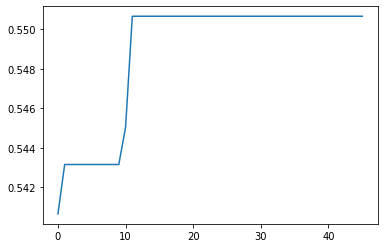

              precision    recall  f1-score   support

         0.0   0.491986  0.499293  0.495612      1414
         1.0   0.598412  0.591368  0.594869      1784

    accuracy                       0.550657      3198
   macro avg   0.545199  0.545330  0.545241      3198
weighted avg   0.551356  0.550657  0.550983      3198

Generations 0/100
Time Taken 47.81 secs Best Output 0.550656660412758
Generations 1/100
Time Taken 48.18 secs Best Output 0.550656660412758
Generations 2/100
Time Taken 47.71 secs Best Output 0.550656660412758
Generations 3/100
Time Taken 48.57 secs Best Output 0.550656660412758
Generations 4/100
Time Taken 47.68 secs Best Output 0.550656660412758
Generations 5/100
Time Taken 47.02 secs Best Output 0.550656660412758
Generations 6/100
Time Taken 46.84 secs Best Output 0.550656660412758
Generations 7/100
Time Taken 48.57 secs Best Output 0.550656660412758
Generations 8/100
Time Taken 49.54 secs Best Output 0.550656660412758
Generations 9/100
Time Taken 46.17 secs Bes

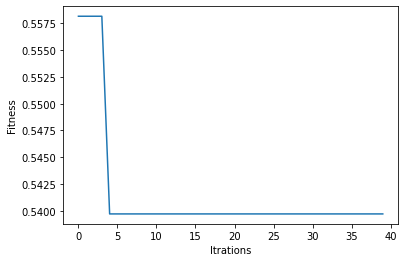

after - 


              precision    recall  f1-score   support

         0.0   0.500353  0.501414  0.500883      1414
         1.0   0.604155  0.603139  0.603647      1784

    accuracy                       0.558161      3198
   macro avg   0.552254  0.552277  0.552265      3198
weighted avg   0.558259  0.558161  0.558210      3198



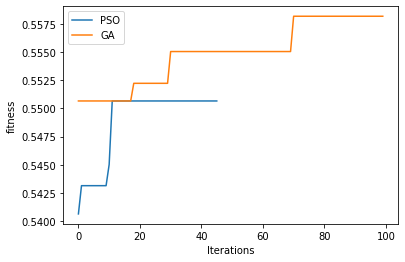

end of CURR MODEL









Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar3/word and doc/liarWord2Vec.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.478201  0.488685  0.483386      1414
         1.0   0.587564  0.577354  0.582414      1784

    accuracy                       0.538149      3198
   macro avg   0.532882  0.533019  0.532900      3198
weighted avg   0.539209  0.538149  0.538629      3198

Epochs: 1/100
Time Taken: 46.497 secs	 Best Score: 0.551594746716698	 Best Score Epoch: 0.551594746716698
Epochs: 2/100
Time Taken: 58.329 secs	 Best Score: 0.557848655409631	 Best Score Epoch: 0.557848655409631
Epochs: 3/100
Time Taken: 56.641 secs	 Best Score: 0.557848655409631	 Best Score Epoch: 0.555972482801751
Epochs: 4/100
Time Taken: 55.723 secs	 Best Score: 0.557848655409631	 Best Score Epoch: 0.555972482801751
Epochs: 5/100
Time Taken: 53.339 secs	 Best Score: 0.557848655

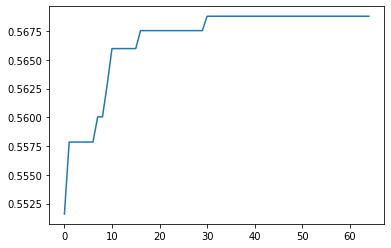

              precision    recall  f1-score   support

         0.0   0.512934  0.490806  0.501626      1414
         1.0   0.609756  0.630605  0.620006      1784

    accuracy                       0.568793      3198
   macro avg   0.561345  0.560706  0.560816      3198
weighted avg   0.566946  0.568793  0.567664      3198

Generations 0/100
Time Taken 50.77 secs Best Output 0.5687929956222639
Generations 1/100
Time Taken 50.47 secs Best Output 0.5687929956222639
Generations 2/100
Time Taken 49.0 secs Best Output 0.5687929956222639
Generations 3/100
Time Taken 50.4 secs Best Output 0.5687929956222639
Generations 4/100
Time Taken 52.92 secs Best Output 0.5687929956222639
Generations 5/100
Time Taken 49.82 secs Best Output 0.5687929956222639
Generations 6/100
Time Taken 51.86 secs Best Output 0.5687929956222639
Generations 7/100
Time Taken 48.32 secs Best Output 0.5687929956222639
Generations 8/100
Time Taken 48.79 secs Best Output 0.5687929956222639
Generations 9/100
Time Taken 53.5 se

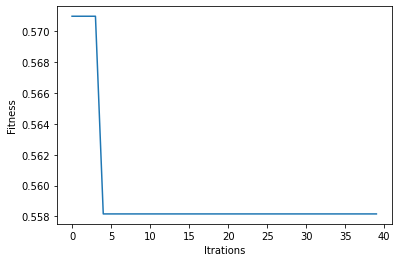

after - 


              precision    recall  f1-score   support

         0.0   0.514685  0.520509  0.517581      1414
         1.0   0.616516  0.610987  0.613739      1784

    accuracy                       0.570982      3198
   macro avg   0.565601  0.565748  0.565660      3198
weighted avg   0.571491  0.570982  0.571222      3198



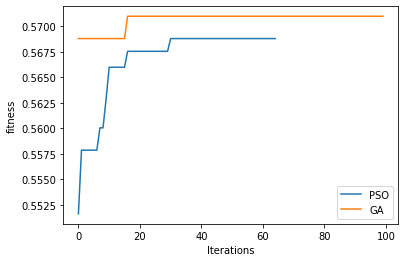

end of CURR MODEL





In [ ]:
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar3/word and doc"
models = [dt]
compiling(models, path)

## tfidf and sent 







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar3/tfidf_sent/liarTfidf.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.516949  0.517680  0.517314      1414
         1.0   0.617284  0.616592  0.616938      1784

    accuracy                       0.572858      3198
   macro avg   0.567117  0.567136  0.567126      3198
weighted avg   0.572921  0.572858  0.572889      3198

Epochs: 1/100
Time Taken: 102.658 secs	 Best Score: 0.5756722951844903	 Best Score Epoch: 0.5756722951844903
Epochs: 2/100
Time Taken: 124.304 secs	 Best Score: 0.5797373358348968	 Best Score Epoch: 0.5797373358348968
Epochs: 3/100
Time Taken: 121.526 secs	 Best Score: 0.5797373358348968	 Best Score Epoch: 0.5775484677923702
Epochs: 4/100
Time Taken: 123.894 secs	 Best Score: 0.5809881175734835	 Best Score Epoch: 0.5809881175734835
Epochs: 5/100
Time Taken: 121.286 secs	 Best Score: 0.5809881175734835	 Best

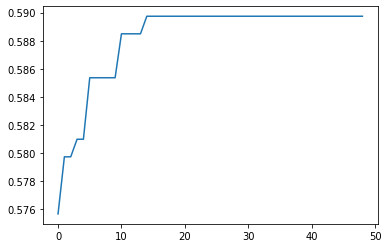

              precision    recall  f1-score   support

         0.0   0.535915  0.538190  0.537050      1414
         1.0   0.632733  0.630605  0.631668      1784

    accuracy                       0.589744      3198
   macro avg   0.584324  0.584397  0.584359      3198
weighted avg   0.589925  0.589744  0.589832      3198

Generations 0/100
Time Taken 116.16 secs Best Output 0.5897435897435898
Generations 1/100
Time Taken 116.8 secs Best Output 0.5897435897435898
Generations 2/100
Time Taken 116.7 secs Best Output 0.5897435897435898
Generations 3/100
Time Taken 115.04 secs Best Output 0.5897435897435898
Generations 4/100
Time Taken 114.96 secs Best Output 0.5897435897435898
Generations 5/100
Time Taken 119.93 secs Best Output 0.5897435897435898
Generations 6/100
Time Taken 118.97 secs Best Output 0.5897435897435898
Generations 7/100
Time Taken 123.01 secs Best Output 0.5897435897435898
Generations 8/100
Time Taken 122.48 secs Best Output 0.5897435897435898
Generations 9/100
Time Take

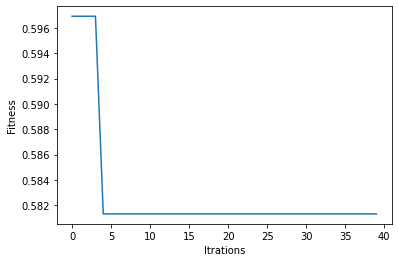

after - 


              precision    recall  f1-score   support

         0.0   0.544803  0.537482  0.541118      1414
         1.0   0.637271  0.644058  0.640647      1784

    accuracy                       0.596936      3198
   macro avg   0.591037  0.590770  0.590882      3198
weighted avg   0.596386  0.596936  0.596640      3198



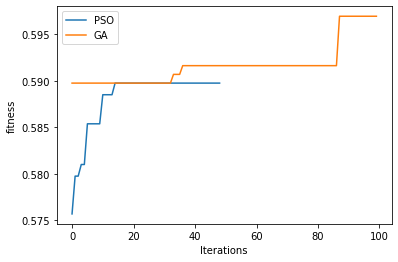

end of CURR MODEL









Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar3/tfidf_sent/liarSentEmbed.npy



current model - DecisionTreeClassifier
before - 


              precision    recall  f1-score   support

         0.0   0.472973  0.470297  0.471631      1414
         1.0   0.582031  0.584641  0.583333      1784

    accuracy                       0.534084      3198
   macro avg   0.527502  0.527469  0.527482      3198
weighted avg   0.533811  0.534084  0.533944      3198

Epochs: 1/100
Time Taken: 161.952 secs	 Best Score: 0.549718574108818	 Best Score Epoch: 0.549718574108818
Epochs: 2/100
Time Taken: 199.899 secs	 Best Score: 0.5565978736710444	 Best Score Epoch: 0.5565978736710444
Epochs: 3/100
Time Taken: 199.071 secs	 Best Score: 0.5565978736710444	 Best Score Epoch: 0.5540963101938712
Epochs: 4/100
Time Taken: 193.591 secs	 Best Score: 0.5584740462789243	 Best Score Epoch: 0.5584740462789243
Epochs: 5/100
Time Taken: 191.483 secs	 Best Score: 0

In [ ]:
path = "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/liar3/tfidf_sent"
models = [dt]
compiling(models, path)

#standard code

In [ ]:
s[:-4] + type(model).__name__ )

'AQ'

In [ ]:
from sklearn import svm
sv = svm.SVC(max_iter=200)

In [ ]:

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=150)

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [ ]:
l = [lr,sv,dt]

In [ ]:
import glob

In [ ]:
files = glob.glob( "/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT"+"/*.npy")

In [ ]:
files

['/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_Tfidf.npy',
 '/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_DocTVec.npy',
 '/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOTWord2Vec.npy']

In [ ]:
for f in files:
  print(f[:-4]+"/"+"lr"+"/bestFeature.npy")

/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_Tfidf/lr/bestFeature.npy
/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_DocTVec/lr/bestFeature.npy
/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOTWord2Vec/lr/bestFeature.npy


In [ ]:
def compiling(models,folder):
  files = glob.glob(folder +"/*.npy")
  for f in files:
    dataset = np.load(f)
    #x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.30, shuffle=False)
    print(5 *"\n")
    print("Running on :" + f)
    print(2*"\n")
    for model in models:
      print("current model - " + type(model).__name__ )
      bestFeatures,Finalscores = trainModel(dataset[:,:-1], dataset[:,-1], model=model, populationSize=40)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/bestFeature.npy",bestFeatures)
      np.save(f[:-4]+"/"+ type(model).__name__ + "/scores.npy",Finalscores)
      print("end of CURR MODEL")
      print(2* "\n")


In [ ]:
compiling(l,"/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT")







Running on :/content/drive/MyDrive/Calibre /FAKE NEWS TRASAC/DATASETS/ISOT/ISOT_Tfidf.npy



current model - LogisticRegression
before - 


              precision    recall  f1-score   support

         0.0   0.931785  0.919639  0.925672      6981
         1.0   0.914742  0.927570  0.921111      6489

    accuracy                       0.923460     13470
   macro avg   0.923263  0.923604  0.923392     13470
weighted avg   0.923575  0.923460  0.923475     13470

Epochs: 1/100	 Time Taken: 323.22 secs	 Best Score: 0.9708240534521159	 Best Score Epoch: 0.9708240534521159
Epochs: 2/100	 Time Taken: 320.081 secs	 Best Score: 0.9739420935412026	 Best Score Epoch: 0.9739420935412026
Epochs: 3/100	 Time Taken: 320.685 secs	 Best Score: 0.9739420935412026	 Best Score Epoch: 0.971863400148478


In [ ]:
x_testNew = reduceFeature(bestFeatures, x_test)

In [ ]:
x_trainNew = reduceFeature(bestFeatures, x_train)

In [ ]:
lr.fit()

ValueError: ignored